# Income Qualification Data Classification Using RandomForest Classifier

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [81]:
incometrain = pd.read_csv("incometrain.csv")
incometest = pd.read_csv("incometest.csv")

In [49]:
print("Shape of Train dataset is {} and Shape of Test dataset is {}".format(incometrain.shape, incometest.shape))

Shape of Train dataset is (9557, 143) and Shape of Test dataset is (23856, 142)


In [4]:
incometrain.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
incometest.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
incometrain.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [7]:
incometrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
incometrain.select_dtypes(include="object").describe()

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_7d7d1cc81,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


# We have 4 categorical variables in our train and test data, Let's preprocess them

In [9]:
incometrain.idhogar.value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
6b35cdcf0    11
4476ccd4c    11
             ..
6f832e4df     1
847c5c79d     1
5c9720da6     1
00e443b00     1
86a6d2dfb     1
Name: idhogar, Length: 2988, dtype: int64

In [10]:
#preprocessing for dependency variable
incometrain.dependency.value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
.80000001      18
3.5            18
1.25           18
2.25           13
.71428573      12
1.2            11
.22222222      11
.83333331      11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [11]:
data = incometrain.dependency
data.head()

0     no
1      8
2      8
3    yes
4    yes
Name: dependency, dtype: object

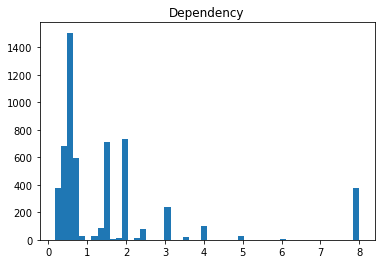

In [12]:
plt.hist(data[data.isin(['yes','no'])==False].astype('float'),bins=50)
plt.title("Dependency")
plt.show()


### Note: On comparing the frequency of values above in the `'dependency'` column we notice that the actual float value starts with `0.5` which is very high in count so it is the `mode` value which will be helpful for us in deciding to go for the Imputation (which means replacing with the Highest Frequency Value) We know that :
Mean -> Average value, Mode -> Highest Frequency, Median -> Seperates the dataset into 2 parts Decision : `'no' = 0` & `'yes' = 0.5`, then convert all the other values to `float` in the `dependency` column

In [82]:
incometrain.dependency = incometrain.dependency.replace('yes',0.5).replace('no',0).astype('float')
incometest.dependency = incometest.dependency.replace('yes',0.5).replace('no',0).astype('float')

In [83]:
incometrain.dependency.value_counts().head()

0.500000    3689
0.000000    1747
2.000000     730
1.500000     713
0.333333     598
Name: dependency, dtype: int64

In [15]:
#preprocessing for variable "edjefe"
incometrain.edjefe.value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

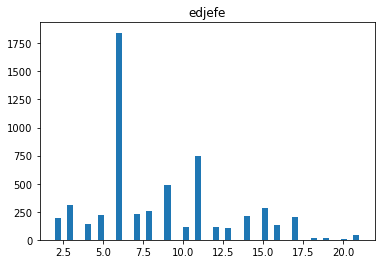

In [84]:
data1 = incometrain.edjefe
plt.hist(data1[data1.isin(['yes','no'])==False].astype('float'),bins=50)
plt.title("edjefe")
plt.show()

In [17]:
med = data1[data1.isin(['yes','no'])==False].astype('float').median()
med

7.0

In [18]:
med1 = np.median(data1[data1.isin(['yes','no'])==False].astype('float'))
med1

7.0

### Note: On comparing the frequency of values above in the `'edjefe'` column we notice that the median float value is somewhere `between` `0.5` & `7.5` which is very high in count so it will be helpful for us to consider this mode value in deciding to go for the Imputation (which means replacing with the Highest Frequency Value) We know that :
Mean -> Average value, Mode -> Highest Frequency, Median -> Seperates the dataset into 2 parts Decision : `'no' = 0` & `'yes' = median`, then convert all the other values to `float` in the `edjefe` column

In [85]:
incometrain.edjefe = incometrain.edjefe.replace('no',0).replace('yes',med).astype('float')
incometest.edjefe = incometest.edjefe.replace('no',0).replace('yes',med).astype('float')

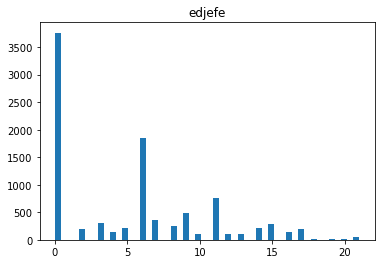

In [20]:
plt.hist(incometrain.edjefe,bins=50)
plt.title("edjefe")
plt.show()

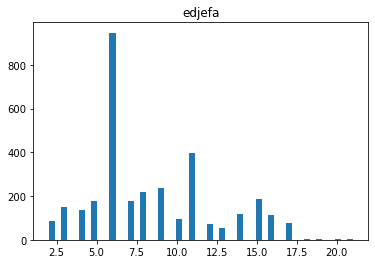

In [21]:
#preprocessing for variable "edjefa"
data2 = incometrain.edjefa
plt.hist(data2[data2.isin(['yes','no'])==False].astype('float'),bins=50)
plt.title("edjefa")
plt.show()

In [22]:
incometrain.edjefa.value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

### Note: On comparing the frequency of values above in the `'edjefa'` column we notice that the median float value is somewhere `between` `0.5` & `7.5` which is very high in count so it will be helpful for us to consider this mode value in deciding to go for the Imputation (which means replacing with the Highest Frequency Value) We know that :
Mean -> Average value, Mode -> Highest Frequency, Median -> Seperates the dataset into 2 parts Decision : `'no' = 0` & `'yes' = median`, then convert all the other values to `float` in the `edjefa` column

In [86]:
med2 = np.median(incometrain.edjefa[incometrain.edjefa.isin(['yes','no'])==False].astype('float'))
incometrain.edjefa = incometrain.edjefa.replace('no',0).replace('yes',med2).astype('float')
incometest.edjefa = incometest.edjefa.replace('no',0).replace('yes',med2).astype('float')

In [24]:
incometrain.edjefa.value_counts().head()

0.0     6230
6.0      947
11.0     399
7.0      248
9.0      237
Name: edjefa, dtype: int64

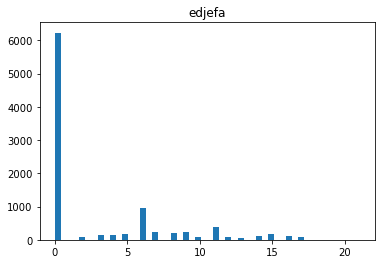

In [25]:
plt.hist(incometrain.edjefa, bins=50)
plt.title("edjefa")
plt.show()

### Now let's clean our data

In [87]:
incometrain.isnull().sum().sort_values(ascending=False)

rez_esc        7928
v18q1          7342
v2a1           6860
meaneduc          5
SQBmeaned         5
               ... 
hogar_total       0
dependency        0
edjefe            0
edjefa            0
Id                0
Length: 143, dtype: int64

In [88]:
incometest.isnull().sum().sort_values(ascending=False)

rez_esc       19653
v18q1         18126
v2a1          17403
SQBmeaned        31
meaneduc         31
              ...  
dependency        0
edjefe            0
edjefa            0
instlevel1        0
Id                0
Length: 142, dtype: int64

### In both train and test datasets i could see huge number of NULL values under columns - rez_esc,v18q1,v2a1
Moderate approach:
    if NULL values are more than 50% we couls drop the variables from dataset
    otherwise if NULL values are lessthan 12% to 15% we can perform Imputaion

In [28]:
print("NULL value percentage of incometrain[rez_esc] is:",incometrain['rez_esc'].isnull().sum()/incometrain.shape[0]*100)
print("NULL value percentage of incometrain[v18q1] is:",incometrain['v18q1'].isnull().sum()/incometrain.shape[0]*100)
print("NULL value percentage of incometrain[v2a1] is:",incometrain['v2a1'].isnull().sum()/incometrain.shape[0]*100)

NULL value percentage of incometrain[rez_esc] is: 82.95490216595167
NULL value percentage of incometrain[v18q1] is: 76.82327090091033
NULL value percentage of incometrain[v2a1] is: 71.7798472323951


In [29]:
print("NULL value percentage of incometest[rez_esc] is:",incometest['rez_esc'].isnull().sum()/incometest.shape[0]*100)
print("NULL value percentage of incometest[v18q1] is:",incometest['v18q1'].isnull().sum()/incometest.shape[0]*100)
print("NULL value percentage of incometest[v2a1] is:",incometest['v2a1'].isnull().sum()/incometest.shape[0]*100)

NULL value percentage of incometest[rez_esc] is: 82.3817907444668
NULL value percentage of incometest[v18q1] is: 75.98088531187123
NULL value percentage of incometest[v2a1] is: 72.95020120724345


### All 3 columns in test and train dataset is above 50%, Hence we are proceeding to drop these columns

In [89]:
train = incometrain.drop(['rez_esc','v18q1','v2a1'], axis=1)
test = incometest.drop(['rez_esc','v18q1','v2a1'], axis=1)

In [90]:
print("Shape of Train dataset is {} and Shape of Test dataset is {}".format(train.shape,test.shape))

Shape of Train dataset is (9557, 140) and Shape of Test dataset is (23856, 139)


In [91]:
# Check for the null value columns again in train
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

meaneduc     5
SQBmeaned    5
dtype: int64

In [92]:
# Check for the null value columns again in test
null_columns = test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

meaneduc     31
SQBmeaned    31
dtype: int64

In [93]:
from sklearn.impute import SimpleImputer
SimpleImputer = SimpleImputer(missing_values=np.nan, strategy='median')
SimpleImputer.fit(train[['meaneduc','SQBmeaned']])

train[['meaneduc','SQBmeaned']] = SimpleImputer.transform(train[['meaneduc','SQBmeaned']])
test[['meaneduc','SQBmeaned']] = SimpleImputer.transform(test[['meaneduc','SQBmeaned']])

In [95]:
train.isnull().sum()

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 140, dtype: int64

In [97]:
train.isin(['NaN']).sum()

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 140, dtype: int64

# Now our data is clean and we are ready to start

## Q) Identify Output variable

In [98]:
incometrain.shape

(9557, 143)

In [99]:
incometest.shape

(23856, 142)

In [38]:
#we could see an extra variable named "Target" in train which is the output variable
incometrain.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### This show the income qualifation in 4 levels

## Q) Understand the type of data

#### This was discussed above in EDA 

## Q) Check if there are any biases in your dataset

Text(0.5, 1.0, 'Output varaible count')

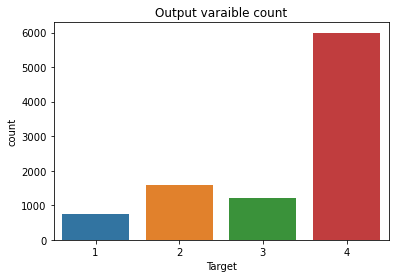

In [39]:
sns.countplot(x=train.Target, data=incometrain)
plt.title("Output varaible count")

#### From above plot there is significant high count for level-4, which show it's highly biased to level 4

## Q) Check whether all members of the house have the same poverty level

In [40]:
print("house Identifier with different poverty levels :")
(train.groupby('idhogar')['Target'].nunique()>1).index

house Identifier with different poverty levels :


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

## Q) Check if there is a house without a family head

In [41]:
print("house Identifier without a family head :")
(train.groupby('idhogar')['parentesco1'].sum()==0).index

house Identifier without a family head :


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

## Q) Set poverty level of the members and the head of the house within a family

In [102]:
target_mean = train.groupby('idhogar')['Target'].mean().astype('int64')\
                    .reset_index()\
                    .rename(columns={'Target':'Target_mean'})

train = train.merge(target_mean, how='left', on='idhogar')
train.Target = train.Target_mean
train.drop('Target_mean', axis=1, inplace=True)
train.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [103]:
print(train.shape)
train.drop(['idhogar'], axis=1, inplace=True)
print(train.shape)
print("")
print(test.shape)
test.drop(['idhogar'], axis=1, inplace=True)
print(test.shape)

(9557, 140)
(9557, 139)

(23856, 139)
(23856, 138)


## Q) Count how many null values are existing in columns

#### Already done above in EDA and removed

## Q) Remove null value rows of the target variable

In [44]:
#Already done above in EDA, please find below
train.Target.isnull().sum()

0

## Q)Predict the accuracy using random forest classifier

In [111]:
X = pd.DataFrame(train.drop(columns=['Target','Id']))
y = train['Target']

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RF_class = RandomForestClassifier(min_samples_leaf=10, min_samples_split=10, random_state=1)
RF_class.fit(X,y)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=1)

In [115]:
pred_test = RF_class.predict(test.drop('Id',axis=1))
pred_test

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [119]:
pred_train = RF_class.predict(X)
pred_train

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [120]:
print(RF_class,
      "\n\nAccuracy Score =", accuracy_score(y_true=y, y_pred=pred_train),
     "\n\nConfusion Matrix = \n", confusion_matrix(y_true=y, y_pred=pred_train),
     "\n\nClassification Report = \n", classification_report(y_true=y, y_pred=pred_train),
     "\n")

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=1) 

Accuracy Score = 0.8461860416448677 

Confusion Matrix = 
 [[ 543   23    0  292]
 [   3 1061    0  511]
 [  12   33  519  590]
 [   2    3    1 5964]] 

Classification Report = 
               precision    recall  f1-score   support

           1       0.97      0.63      0.77       858
           2       0.95      0.67      0.79      1575
           3       1.00      0.45      0.62      1154
           4       0.81      1.00      0.90      5970

    accuracy                           0.85      9557
   macro avg       0.93      0.69      0.77      9557
weighted avg       0.87      0.85      0.83      9557
 



## Q) Check the accuracy using random forest with cross validation

In [121]:
from sklearn.model_selection import cross_val_score
crossval = cross_val_score(RF_class, X, y, scoring="accuracy", cv=10)
crossval

array([0.65481172, 0.65376569, 0.63912134, 0.63179916, 0.63493724,
       0.65271967, 0.62970711, 0.63560209, 0.6       , 0.63036649])

In [122]:
print("Average Accuracy :",np.mean(crossval))
print("Minimun Accuracy :", np.min(crossval))
print("Maximum Accuracy :", np.max(crossval))

Average Accuracy : 0.6362830511073627
Minimun Accuracy : 0.6
Maximum Accuracy : 0.6548117154811716
